In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [26]:
df.shape

(51290, 23)

In [28]:
df = pd.read_csv('./data.csv',encoding='ISO-8859-1')
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [29]:
df.drop("Postal Code",axis=1,inplace=True)

df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [32]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [34]:
df.shape

(51290, 23)

In [36]:
df['Category'].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [38]:
df["Order Date"]=pd.to_datetime(df["Order Date"], dayfirst=True)
df["Ship Date"]=pd.to_datetime(df["Ship Date"], dayfirst=True)

In [40]:
df["Year Ordered"]=df["Order Date"].dt.year
df["Month Ordered"]=df["Order Date"].dt.month
df["Month Shiped"]=df["Ship Date"].dt.year
df["Month Shiped"]=df["Ship Date"].dt.month

In [42]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year Ordered,Month Ordered,Month Shiped
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,7,7
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,2,2
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013,10,10
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013,1,1
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013,11,11


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Market          51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

In [46]:
df.describe()

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Shipping Cost,Year Ordered,Month Ordered,Month Shiped
count,51290.00000,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.610982,26.375915,2012.777208,7.522636,7.463853
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.000000,2011.000000,1.000000,1.000000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000,5.000000,5.000000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000,8.000000,8.000000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000,10.000000,10.000000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000,12.000000,12.000000
std,14806.29199,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.296804,1.098931,3.300056,3.346124


In [48]:
daily_demand = df.groupby(['Order Date', 'Ship Mode', 'Segment', 'Category']).agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Discount': 'mean',
    'Shipping Cost': 'mean'
}).reset_index()


In [50]:
daily_demand.head()

,Order Date,Ship Mode,Segment,Category,Sales,Quantity,Discount,Shipping Cost
0,2011-01-01,Second Class,Consumer,Office Supplies,66.120,4,0.000000,8.17
1,2011-01-01,Second Class,Home Office,Office Supplies,44.865,3,0.500000,4.82
2,2011-01-01,Standard Class,Consumer,Furniture,113.670,5,0.100000,4.70
3,2011-01-01,Standard Class,Consumer,Office Supplies,583.908,7,0.066667,15.66
4,2011-01-02,Standard Class,Consumer,Technology,314.220,1,0.000000,24.10


In [52]:
daily_demand['Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [54]:
daily_demand.shape

(18493, 8)

In [56]:
daily_demand = pd.get_dummies(daily_demand, columns=['Ship Mode', 'Segment', 'Category'])

In [58]:
daily_demand.head()

,Order Date,Sales,Quantity,Discount,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology
0,2011-01-01,66.120,4,0.000000,8.17,False,False,True,False,True,False,False,False,True,False
1,2011-01-01,44.865,3,0.500000,4.82,False,False,True,False,False,False,True,False,True,False
2,2011-01-01,113.670,5,0.100000,4.70,False,False,False,True,True,False,False,True,False,False
3,2011-01-01,583.908,7,0.066667,15.66,False,False,False,True,True,False,False,False,True,False
4,2011-01-02,314.220,1,0.000000,24.10,False,False,False,True,True,False,False,False,False,True


In [60]:
daily_demand.columns

Index(['Order Date', 'Sales', 'Quantity', 'Discount', 'Shipping Cost',
       'Ship Mode_First Class', 'Ship Mode_Same Day', 'Ship Mode_Second Class',
       'Ship Mode_Standard Class', 'Segment_Consumer', 'Segment_Corporate',
       'Segment_Home Office', 'Category_Furniture', 'Category_Office Supplies',
       'Category_Technology'],
      dtype='object')

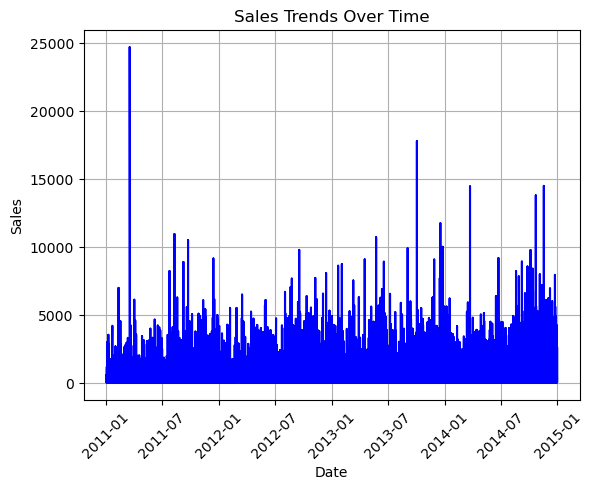

In [62]:
plt.plot(daily_demand['Order Date'], daily_demand['Sales'], color='blue')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

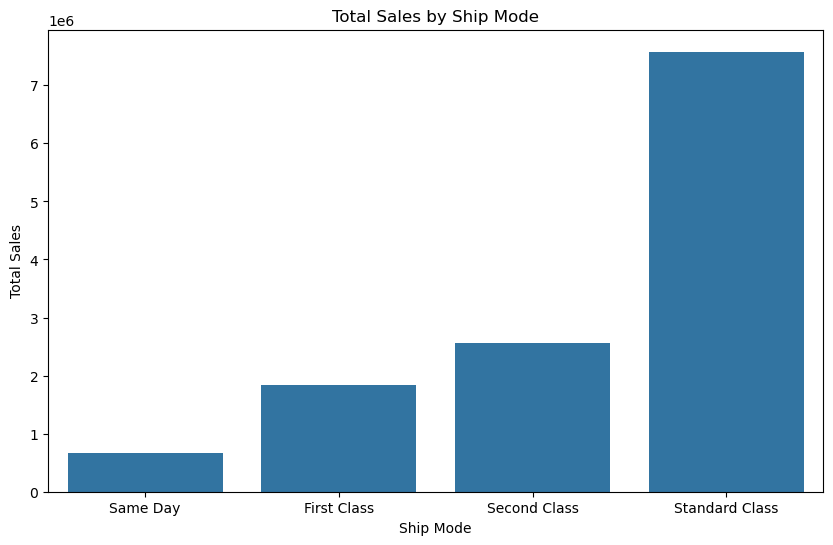

In [64]:
ship_mode_sales=daily_demand[['Sales', 'Ship Mode_Same Day','Ship Mode_First Class', 'Ship Mode_Second Class', 'Ship Mode_Standard Class']]

same_day_sales=ship_mode_sales['Sales'][ship_mode_sales['Ship Mode_Same Day']].sum()
First_class_sales=ship_mode_sales['Sales'][ship_mode_sales['Ship Mode_First Class']].sum()
second_class_sales=ship_mode_sales['Sales'][ship_mode_sales['Ship Mode_Second Class']].sum()
standard_class_sales=ship_mode_sales['Sales'][ship_mode_sales['Ship Mode_Standard Class']].sum()
ship_mode_sales_summed=pd.DataFrame({'Ship Mode': ['Same Day','First Class', 'Second Class', 'Standard Class'],'Sales': [same_day_sales,First_class_sales, second_class_sales, standard_class_sales]})
plt.figure(figsize=(10, 6))
sns.barplot(data=ship_mode_sales_summed, x='Ship Mode', y='Sales')
plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')

plt.show()



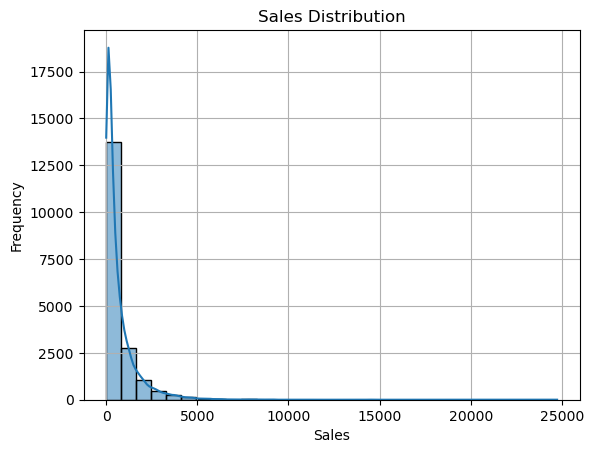

In [66]:
sns.histplot(daily_demand['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [68]:
daily_demand=daily_demand.astype({'Ship Mode_First Class': 'int','Ship Mode_Same Day':'int','Ship Mode_Second Class':'int','Ship Mode_Standard Class':'int','Segment_Consumer':'int','Segment_Corporate':'int','Segment_Home Office':'int','Category_Furniture':'int','Category_Office Supplies':'int','Category_Technology':'int' })

numeric_daily_demand=daily_demand.select_dtypes(include=[np.number])
correlation=numeric_daily_demand.corr()
print(correlation)

                             Sales  Quantity  Discount  Shipping Cost  \
Sales                     1.000000  0.436083 -0.081671       0.453626   
Quantity                  0.436083  1.000000 -0.009099      -0.052389   
Discount                 -0.081671 -0.009099  1.000000      -0.091022   
Shipping Cost             0.453626 -0.052389 -0.091022       1.000000   
Ship Mode_First Class    -0.103974 -0.136225  0.010810       0.117668   
Ship Mode_Same Day       -0.084599 -0.116397 -0.003955       0.070120   
Ship Mode_Second Class   -0.079311 -0.111537 -0.009179       0.010471   
Ship Mode_Standard Class  0.201558  0.273883  0.001480      -0.144381   
Segment_Consumer          0.104695  0.143788  0.010781       0.023028   
Segment_Corporate        -0.035461 -0.051595 -0.003908      -0.004650   
Segment_Home Office      -0.083491 -0.111462 -0.008314      -0.021854   
Category_Furniture        0.079129 -0.162021  0.078755       0.130999   
Category_Office Supplies -0.207987  0.293230 -0.046

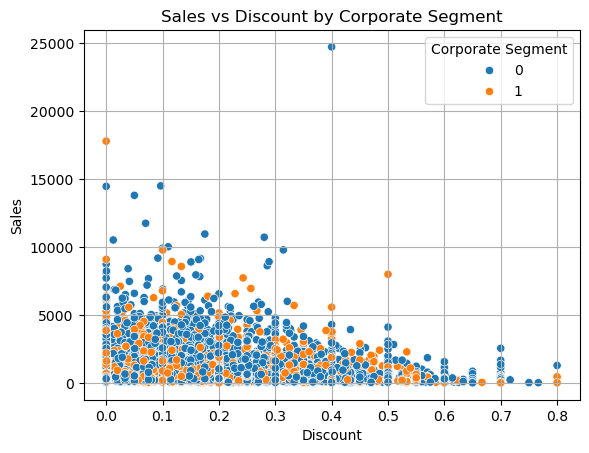

In [70]:
sns.scatterplot(data=daily_demand,x='Discount',y='Sales',hue='Segment_Corporate')
plt.title('Sales vs Discount by Corporate Segment')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.grid()
plt.legend(title='Corporate Segment')
plt.show()


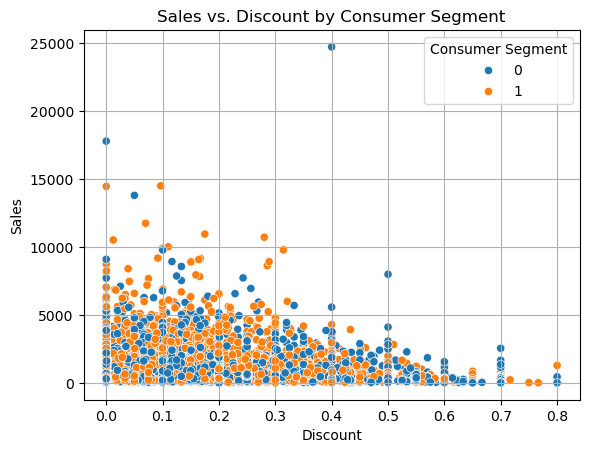

In [72]:
sns.scatterplot(data=daily_demand,x='Discount',y='Sales',hue='Segment_Consumer')
plt.title('Sales vs. Discount by Consumer Segment')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.grid()
plt.legend(title='Consumer Segment')
plt.show()

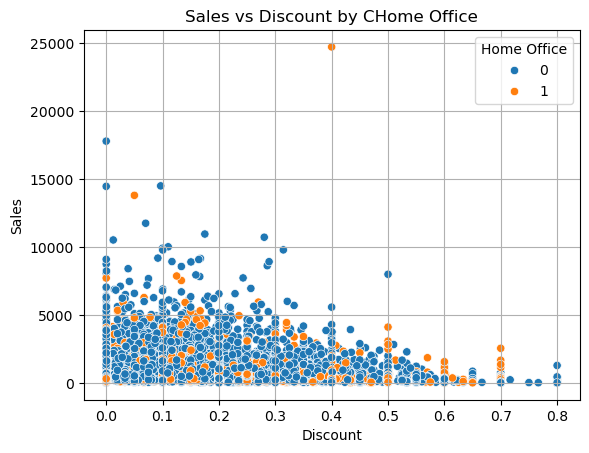

In [74]:
sns.scatterplot(data=daily_demand,x='Discount',y='Sales',hue='Segment_Home Office')
plt.title('Sales vs Discount by CHome Office')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.grid()
plt.legend(title='Home Office')
plt.show()

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

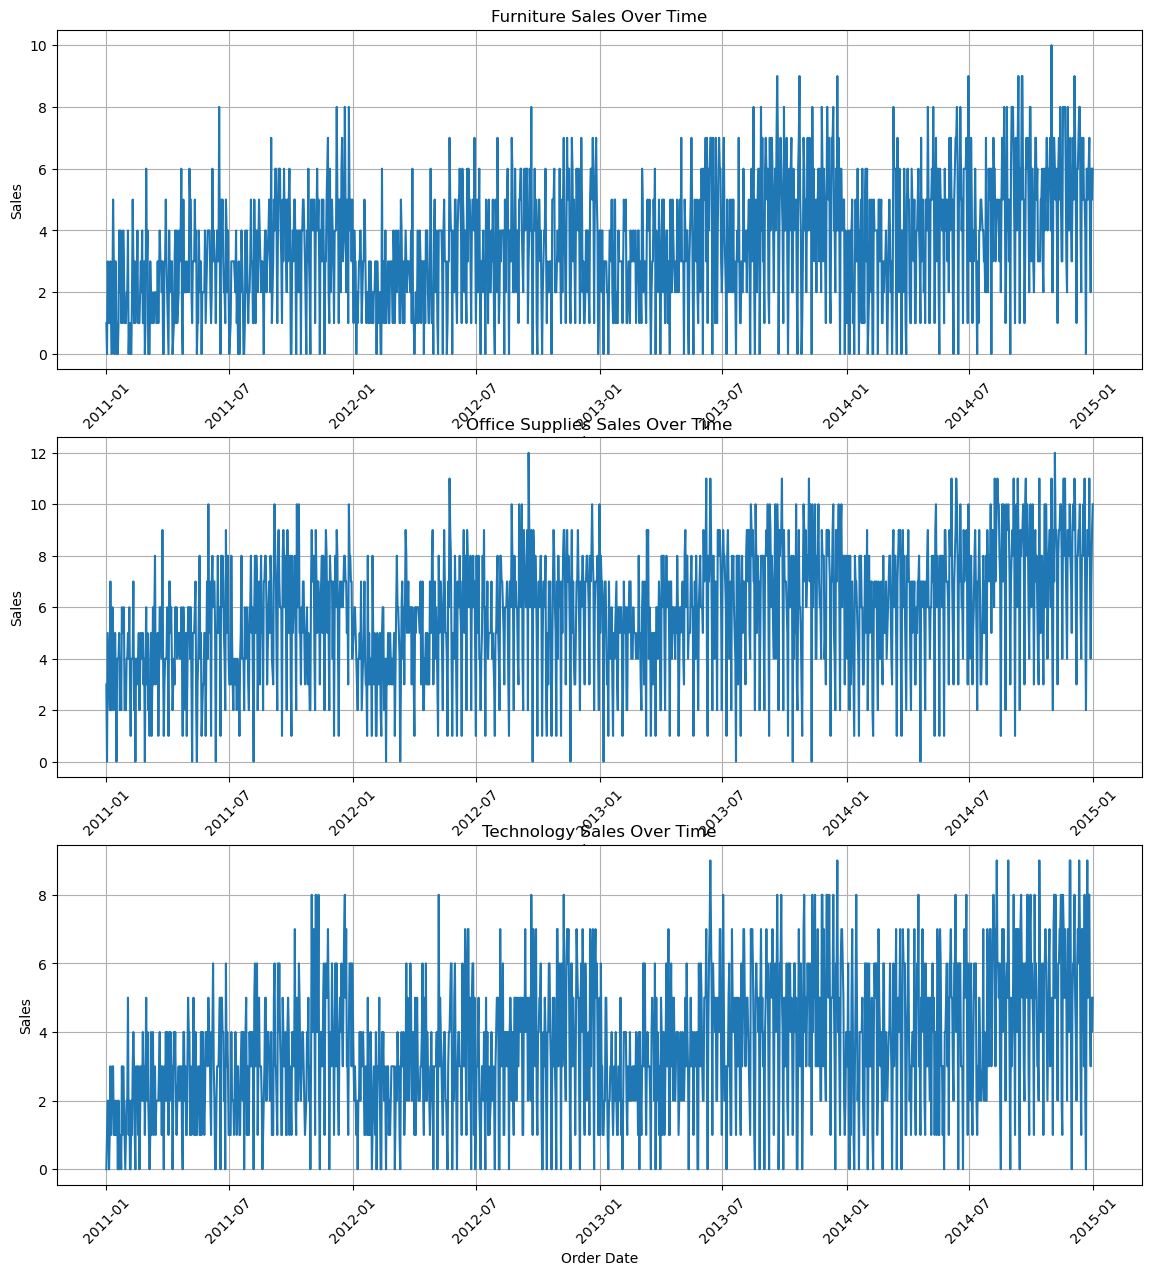

In [69]:
daily_demand['Order Date'] = pd.to_datetime(daily_demand['Order Date'])
sales_by_category = daily_demand.groupby(['Order Date']).agg({'Sales': 
                                                              'sum','Category_Furniture': 'sum','Category_Office Supplies': 'sum','Category_Technology': 'sum'}).reset_index()
plt.figure(figsize=(14, 15))
plt.subplot(3, 1, 1)
plt.plot(sales_by_category['Order Date'],sales_by_category['Category_Furniture'])
plt.title('Furniture Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid()
plt.subplot(3, 1, 2)
plt.plot(sales_by_category['Order Date'],sales_by_category['Category_Office Supplies'])
plt.title('Office Supplies Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid()
plt.subplot(3, 1, 3)
plt.plot(sales_by_category['Order Date'],sales_by_category['Category_Technology'])
plt.title('Technology Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid()




In [71]:
daily_demand.head()

,Order Date,Sales,Quantity,Discount,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology
0,2011-01-01,66.120,4,0.000000,8.17,0,0,1,0,1,0,0,0,1,0
1,2011-01-01,44.865,3,0.500000,4.82,0,0,1,0,0,0,1,0,1,0
2,2011-01-01,113.670,5,0.100000,4.70,0,0,0,1,1,0,0,1,0,0
3,2011-01-01,583.908,7,0.066667,15.66,0,0,0,1,1,0,0,0,1,0
4,2011-01-02,314.220,1,0.000000,24.10,0,0,0,1,1,0,0,0,0,1


In [73]:
daily_demand.to_csv('example.csv',index=False)

In [75]:
df = pd.read_csv('data.csv', parse_dates=['Order Date'], index_col='Order Date', encoding='ISO-8859-1')
scaler = MinMaxScaler()
df['Sales'] = scaler.fit_transform(df[['Sales']])


C:\Users\KAVIN\AppData\Local\Temp\ipykernel_20416\2763633883.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('data.csv', parse_dates=['Order Date'], index_col='Order Date', encoding='ISO-8859-1')


In [77]:
def create_sequences(data, n_input, n_output):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_input
        out_end_ix = end_ix + n_output
        if out_end_ix > len(data):
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


In [79]:
n_input = 14
n_output = 7
train_size = int(len(df) * 0.9)
train, test = df['Sales'].values[:train_size], df['Sales'].values[train_size:]


In [81]:
X_train, y_train = create_sequences(train, n_input, n_output)
X_test, y_test = create_sequences(test, n_input, n_output)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [83]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_input, 1)),
    Dense(n_output)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


C:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [85]:
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[es], verbose=1)


Epoch 1/50
1154/1154 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 3.2685e-04 - val_loss: 2.3016e-05
Epoch 2/50
1154/1154 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.4070e-04 - val_loss: 1.3671e-05
Epoch 3/50
1154/1154 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.4668e-04 - val_loss: 1.9463e-05
Epoch 4/50
1154/1154 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.4659e-04 - val_loss: 1.4809e-05
Epoch 5/50
1154/1154 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 2.4312e-04 - val_loss: 1.5351e-05
Epoch 6/50
1154/1154 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.3929e-04 - val_loss: 2.0897e-05
Epoch 7/50
1154/1154 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.5143e-04 - val_loss: 2.0020e-05
Epoch 8/50
1154/1154 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.4288e-04 - val_loss: 1.5328e-05
Epoch 9/50
1154/1154 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 2.3701e-04 - val_loss: 1.5166e-05
Epoch 10/50
1154/1154 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.6297e-04 - val_loss: 1.6803e-05
Epoch 11/50
1154/1154 ━━━━━━━━━━━━━━━━━

In [87]:
y_pred = model.predict(X_test)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [89]:
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Error (MAE): 26.730112506415708
Root Mean Squared Error (RMSE): 38.97996087656487
Mean Absolute Percentage Error (MAPE): 376.0648574157659%


In [91]:
def forecast(model, data, n_input):
    input_seq = data[-n_input:]
    input_seq = input_seq.reshape((1, n_input, 1))
    yhat = model.predict(input_seq, verbose=0)
    return yhat[0]


In [93]:
forecast_seq = forecast(model, df['Sales'].values, n_input)
forecast_seq = scaler.inverse_transform(forecast_seq.reshape(-1, 1)).flatten()
print("Forecast for the next", n_output, "days:", forecast_seq)


Forecast for the next 7 days: [59.65929  52.162548 43.297764 33.486454 16.349483 32.36679  29.853092]


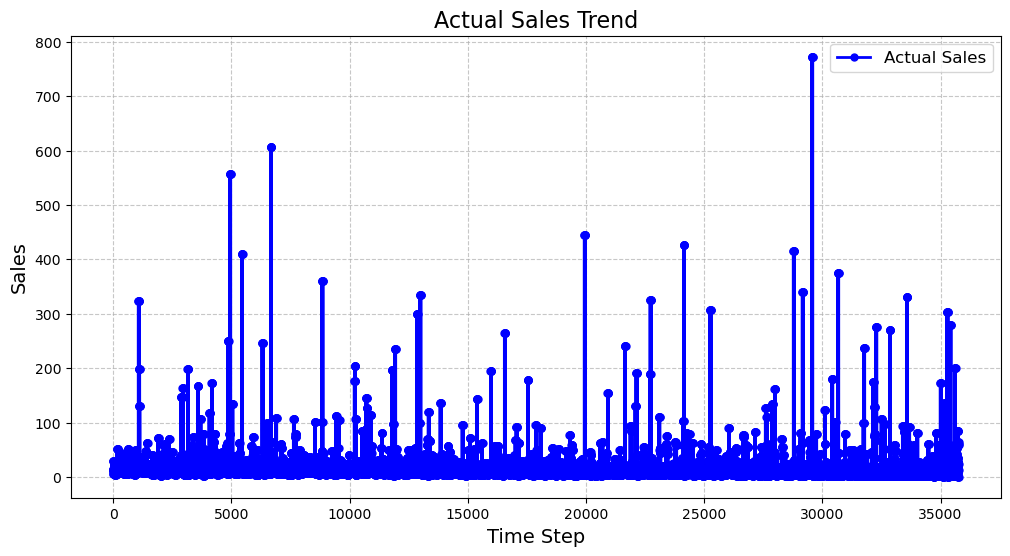

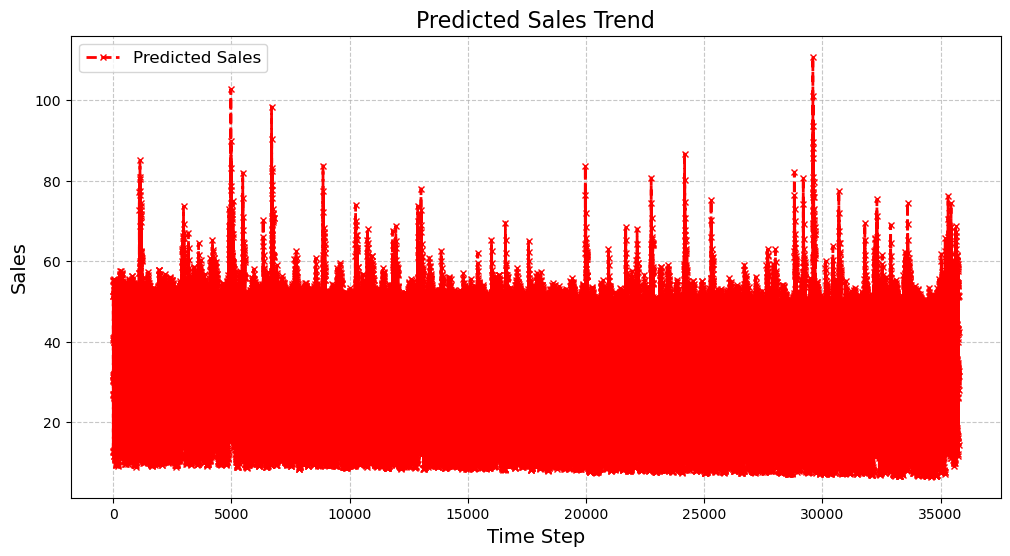

In [95]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Sales", color='blue', linestyle='-', linewidth=2, marker='o', markersize=5)
plt.xlabel("Time Step", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.title("Actual Sales Trend", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

# Plot Predicted Sales Trend
plt.figure(figsize=(12, 6))
plt.plot(y_pred_rescaled, label="Predicted Sales", color='red', linestyle='--', linewidth=2, marker='x', markersize=5)
plt.xlabel("Time Step", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.title("Predicted Sales Trend", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

In [153]:
def remove_outliers(df, column, lower_quantile=0.01, upper_quantile=0.99):
    lower_bound = df[column].quantile(lower_quantile)
    upper_bound = df[column].quantile(upper_quantile)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


df = remove_outliers(df, 'Sales')

In [151]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df.dropna(subset=['Order Date'], inplace=True)
df.set_index('Order Date', inplace=True)


In [155]:
df['Sales_Sqrt'] = np.sqrt(df['Sales'])

In [157]:
df['DayOfWeek']=df.index.dayofweek
df['IsWeekend']=(df['DayOfWeek'] >= 5).astype(int)
df['Month']=df.index.month
df['Quarter']=df.index.quarter
df['Year']=df.index.year



In [159]:
df.columns

Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Postal Code',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Sales_Sqrt', 'DayOfWeek',
       'IsWeekend', 'Month', 'Quarter', 'Year'],
      dtype='object')

In [161]:
df.index

DatetimeIndex(['2011-11-07', '2012-11-13', '2014-07-31', '2014-11-03',
               '2012-08-08', '2014-07-31', '2014-09-05', '2011-12-17',
               '2012-02-25', '2011-12-28',
               ...
               '2011-03-21', '2014-11-29', '2014-06-09', '2012-12-28',
               '2014-05-30', '2014-08-05', '2014-06-19', '2013-12-02',
               '2012-02-18', '2012-05-22'],
              dtype='datetime64[ns]', name='Order Date', length=50266, freq=None)

In [163]:
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Discount,Profit,Shipping Cost,Order Priority,Sales_Sqrt,DayOfWeek,IsWeekend,Month,Quarter,Year
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-11-07,30570,IN-2011-81826,09-11-2011,First Class,TS-21340,Toby Swindell,Consumer,Porirua,Wellington,New Zealand,...,0.0,564.8400,894.77,Critical,42.685829,0,0,11,4,2011
2012-11-13,4132,MX-2012-130015,13-11-2012,Same Day,VF-21715,Vicky Freymann,Home Office,Toledo,Parana,Brazil,...,0.0,622.0200,810.25,Critical,47.135974,1,0,11,4,2012
2014-07-31,13779,ES-2014-5099955,03-08-2014,Second Class,BP-11185,Ben Peterman,Corporate,Paris,Ile-de-France,France,...,0.1,186.9480,801.66,Critical,43.238733,3,0,7,3,2014
2014-11-03,36178,CA-2014-143567,06-11-2014,Second Class,TB-21175,Thomas Boland,Corporate,Henderson,Kentucky,United States,...,0.0,517.4793,780.70,Critical,47.433216,0,0,11,4,2014
2012-08-08,46630,PL-2012-7820,10-08-2012,First Class,AB-600,Ann Blume,Corporate,Bytom,Silesia,Poland,...,0.0,276.8400,759.47,Critical,44.471564,2,0,8,3,2012


In [165]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

In [167]:
df['Season']=df['Month'].apply(get_season)

In [169]:
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Profit,Shipping Cost,Order Priority,Sales_Sqrt,DayOfWeek,IsWeekend,Month,Quarter,Year,Season
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-11-07,30570,IN-2011-81826,09-11-2011,First Class,TS-21340,Toby Swindell,Consumer,Porirua,Wellington,New Zealand,...,564.8400,894.77,Critical,42.685829,0,0,11,4,2011,Fall
2012-11-13,4132,MX-2012-130015,13-11-2012,Same Day,VF-21715,Vicky Freymann,Home Office,Toledo,Parana,Brazil,...,622.0200,810.25,Critical,47.135974,1,0,11,4,2012,Fall
2014-07-31,13779,ES-2014-5099955,03-08-2014,Second Class,BP-11185,Ben Peterman,Corporate,Paris,Ile-de-France,France,...,186.9480,801.66,Critical,43.238733,3,0,7,3,2014,Summer
2014-11-03,36178,CA-2014-143567,06-11-2014,Second Class,TB-21175,Thomas Boland,Corporate,Henderson,Kentucky,United States,...,517.4793,780.70,Critical,47.433216,0,0,11,4,2014,Fall
2012-08-08,46630,PL-2012-7820,10-08-2012,First Class,AB-600,Ann Blume,Corporate,Bytom,Silesia,Poland,...,276.8400,759.47,Critical,44.471564,2,0,8,3,2012,Summer


In [171]:
for lag in range(1, 15):
    df['Lag_' + str(lag)] = df['Sales_Sqrt'].shift(lag)

In [173]:
df['Lag_3_MA'] = df['Sales_Sqrt'].shift(3).rolling(window=3).mean()
df['Lag_7_MA'] = df['Sales_Sqrt'].shift(7).rolling(window=7).mean()

In [175]:
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Lag_7,Lag_8,Lag_9,Lag_10,Lag_11,Lag_12,Lag_13,Lag_14,Lag_3_MA,Lag_7_MA
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-11-07,30570,IN-2011-81826,09-11-2011,First Class,TS-21340,Toby Swindell,Consumer,Porirua,Wellington,New Zealand,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-13,4132,MX-2012-130015,13-11-2012,Same Day,VF-21715,Vicky Freymann,Home Office,Toledo,Parana,Brazil,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-31,13779,ES-2014-5099955,03-08-2014,Second Class,BP-11185,Ben Peterman,Corporate,Paris,Ile-de-France,France,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-03,36178,CA-2014-143567,06-11-2014,Second Class,TB-21175,Thomas Boland,Corporate,Henderson,Kentucky,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-08-08,46630,PL-2012-7820,10-08-2012,First Class,AB-600,Ann Blume,Corporate,Bytom,Silesia,Poland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
df.columns

Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Postal Code',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Sales_Sqrt', 'DayOfWeek',
       'IsWeekend', 'Month', 'Quarter', 'Year', 'Season', 'Lag_1', 'Lag_2',
       'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6', 'Lag_7', 'Lag_8', 'Lag_9', 'Lag_10',
       'Lag_11', 'Lag_12', 'Lag_13', 'Lag_14', 'Lag_3_MA', 'Lag_7_MA'],
      dtype='object')

In [179]:
df = pd.get_dummies(df, columns=['Category', 'Ship Mode', 'Season'], drop_first=True)

In [181]:
df['is_zero_sales'] = (df['Sales_Sqrt'] == 0).astype(int)
product_stats = df.groupby('Product ID').agg({
    'Sales_Sqrt': 'sum',
    'is_zero_sales': 'mean'
}).reset_index()

In [183]:
product_stats

,Product ID,Sales_Sqrt,is_zero_sales
0,FUR-ADV-10000002,17.582371,0.0
1,FUR-ADV-10000108,31.216325,0.0
2,FUR-ADV-10000183,83.488961,0.0
3,FUR-ADV-10000188,24.101507,0.0
4,FUR-ADV-10000190,14.911740,0.0
...,...,...,...
10237,TEC-STA-10004181,129.265040,0.0
10238,TEC-STA-10004536,94.053165,0.0
10239,TEC-STA-10004542,58.260146,0.0
10240,TEC-STA-10004834,18.813880,0.0


In [185]:
product_stats['sales_rank']=product_stats['Sales_Sqrt'].rank(ascending=False)

In [187]:
product_stats['group'] = np.select(
    [(product_stats['sales_rank'] <= product_stats['sales_rank'].quantile(0.33)) & (product_stats['is_zero_sales'] <= product_stats['is_zero_sales'].quantile(0.33)),
     (product_stats['sales_rank'] >= product_stats['sales_rank'].quantile(0.67)) & (product_stats['is_zero_sales'] >= product_stats['is_zero_sales'].quantile(0.67))
    ],
    ['G1', 'G2'], default='G3')
df = df.merge(product_stats[['Product ID', 'group']], on='Product ID', how='left')

In [189]:
product_stats

,Product ID,Sales_Sqrt,is_zero_sales,sales_rank,group
0,FUR-ADV-10000002,17.582371,0.0,8294.0,G2
1,FUR-ADV-10000108,31.216325,0.0,6381.0,G3
2,FUR-ADV-10000183,83.488961,0.0,2331.0,G1
3,FUR-ADV-10000188,24.101507,0.0,7342.0,G2
4,FUR-ADV-10000190,14.911740,0.0,8685.0,G2
...,...,...,...,...,...
10237,TEC-STA-10004181,129.265040,0.0,1000.0,G1
10238,TEC-STA-10004536,94.053165,0.0,1912.0,G1
10239,TEC-STA-10004542,58.260146,0.0,3716.0,G3
10240,TEC-STA-10004834,18.813880,0.0,8105.0,G2


In [191]:
def create_sequences(data, target_column_index, n_input, n_output):
    X, y=[], []
    for i in range(len(data)):
        end_ix=i + n_input
        out_end_ix=end_ix + n_output
        if out_end_ix > len(data):
            break
        
        seq_x=data[i:end_ix]  
        seq_y=data[end_ix:out_end_ix, target_column_index]  
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


In [193]:
n_input=10 
n_output=7

In [195]:
for group in df['group'].unique():
    group_data=df[df['group']==group].dropna()
    features=group_data[['Sales_Sqrt', 'DayOfWeek', 'IsWeekend', 'Month', 'Quarter', 'Year',  'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 
                           'Lag_6', 'Lag_7', 'Lag_8', 'Lag_9', 'Lag_10', 'Lag_11', 'Lag_12', 'Lag_13', 'Lag_14', 'Lag_3_MA', 'Lag_7_MA']].values


In [197]:
data_groups = {}  
for group in df['group'].unique():
    group_data=df[df['group']==group].dropna()  # Drop rows with NaN
    features=group_data[['Sales_Sqrt', 'DayOfWeek', 'IsWeekend', 'Month', 'Quarter', 'Year','Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 
                           'Lag_6', 'Lag_7', 'Lag_8', 'Lag_9', 'Lag_10','Lag_11', 'Lag_12', 'Lag_13', 'Lag_14', 'Lag_3_MA', 'Lag_7_MA', ]].values
    target_column_index = 0 
    X, y=create_sequences(features, target_column_index, n_input, n_output)
    print(f"Group: {group}, X shape: {X.shape}, y shape: {y.shape}")  # Debug print to check shapes
    data_groups[group] = (X.reshape((X.shape[0], X.shape[1], features.shape[1])), y)


Group: G1, X shape: (3997, 10, 22), y shape: (3997, 7)
Group: G3, X shape: (3117, 10, 22), y shape: (3117, 7)
Group: G2, X shape: (2399, 10, 22), y shape: (2399, 7)


In [199]:
def build_lstm_model(n_input, n_output, n_features):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(n_input, n_features)),
        Dense(n_output)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

In [201]:
models = {}
for group, (X, y) in data_groups.items():
    print(f"Training LSTM model for group {group}...")
    y = y.reshape((y.shape[0], n_output))
    model = build_lstm_model(n_input, n_output, X.shape[2])  
    #es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit(X, y, epochs=50, validation_split=0.2, verbose=1)
    models[group] = model


Training LSTM model for group G1...
Epoch 1/50


C:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 22318.2715 - val_loss: 368.2741
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 111.4612 - val_loss: 178.0425
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 77.2717 - val_loss: 124.3745
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 58.8469 - val_loss: 84.9188
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.3398 - val_loss: 67.6211
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43.0658 - val_loss: 51.4694
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39.0936 - val_loss: 41.0727
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.9402 - val_loss: 33.0525
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33.4995 - val_loss: 29.3820
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31.8797 - val_loss: 26.1683
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.1318 - val_loss: 23.2387
Epoch 12/50
100/100 ━━━━━━━━━━━━━━

Shape of test_data_numeric before conversion: (10, 22)
Shape of test_data_numeric after reshaping:(1, 10, 22)
Mean Absolute Error (MAE):2.980816641953095
Root Mean Squared Error (RMSE):3.7456896379479168
Mean Absolute Percentage Error (MAPE):52.90169419896059%
Predicted Values: [6.2774506 9.205337  5.622698  6.5383987 3.3425074 6.509735  7.060369 ]
Actual Values: [14.1562707   6.45290632  7.2518963   2.31603109  5.84191749  7.61905506
  7.83453891]


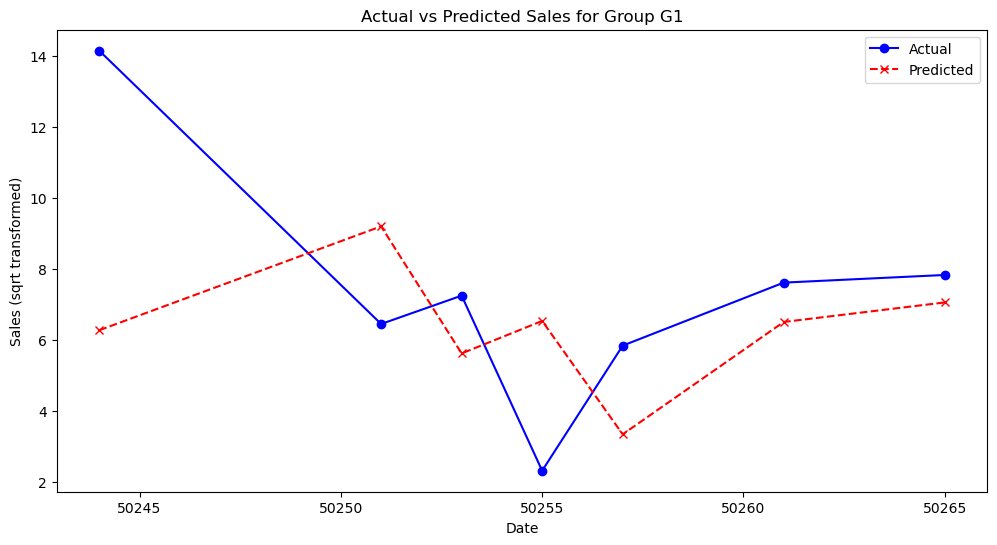

In [205]:
group = 'G1' 
if group in models:  
    test_data = df[df['group']==group].dropna().values[-n_input:, :] 
    expected_columns = ['Sales_Sqrt', 'DayOfWeek', 'IsWeekend', 'Month', 'Quarter', 'Year', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 
                        'Lag_6', 'Lag_7', 'Lag_8', 'Lag_9', 'Lag_10','Lag_11', 'Lag_12', 'Lag_13', 'Lag_14','Lag_3_MA', 'Lag_7_MA']  
    test_df = pd.DataFrame(test_data,columns=df.columns)
    
    
    test_data_numeric = test_df[expected_columns].values

    
    print(f"Shape of test_data_numeric before conversion: {test_data_numeric.shape}")

    
    if test_data_numeric.shape[1] != len(expected_columns):
        raise ValueError(f"Expected {len(expected_columns)} features, but got {test_data_numeric.shape[1]} features.")

    test_data_numeric = test_data_numeric.astype(np.float32)  
    test_data_numeric = test_data_numeric.reshape((1,n_input,test_data_numeric.shape[1]))  
    
    
    print(f"Shape of test_data_numeric after reshaping:{test_data_numeric.shape}")

    yhat=models[group].predict(test_data_numeric, verbose=0).flatten() 

    
    actual_values=df[df['group']==group]['Sales_Sqrt'].values[-n_output:] 
    
    if len(actual_values)==len(yhat):
        mae=mean_absolute_error(actual_values, yhat)
        rmse=np.sqrt(mean_squared_error(actual_values, yhat))
        mape=np.mean(np.abs((actual_values - yhat)/actual_values))*100

        print(f"Mean Absolute Error (MAE):{mae}")
        print(f"Root Mean Squared Error (RMSE):{rmse}")
        print(f"Mean Absolute Percentage Error (MAPE):{mape}%")
        print("Predicted Values:",yhat)
        print("Actual Values:",actual_values)

        
        plt.figure(figsize=(12, 6))
        dates = df[df['group']==group].index[-n_output:] 
        plt.plot(dates, actual_values, label="Actual", marker='o', color='b', linestyle='-')
        plt.plot(dates, yhat, label="Predicted", marker='x', color='r', linestyle='--')
        plt.title(f'Actual vs Predicted Sales for Group {group}')
        plt.xlabel('Date')
        plt.ylabel('Sales (sqrt transformed)')
        plt.legend()
        plt.show()
    else:
        print("Mismatch in lengths of actual and predicted values.")
else:
    print(f"No model found for group {group}.")